# Regressão linear simples

### Método dos mínimos quadrados

$$ R = \sum_{i=1}^{n}(y_i - M_i)^2 $$

#### Meu modelo
$$ M=b_0 + b_1x \\ b_0=? \\ b_1=?$$

$$ R=\sum_{i=1}^n(y_i - b_0 - b_1x_i)^2 $$

Quero calular $b_0$ e $b_1$ que minimizem $R$

$$
\begin{cases}
\frac{\partial R}{\partial b_0} = 0\\
\frac{\partial R}{\partial b_1} = 0
\end{cases}
$$

$$ \frac{\partial R}{\partial b_0} = -2 \sum_{i=1}^n(y_i - b_0 - b_1x_i) = 0 $$
$$ \frac{\partial R}{\partial b_1} = -2 \sum_{i=1}^n(y_i - b_0 - b_1x_i) = 0 $$

Reescrevendo


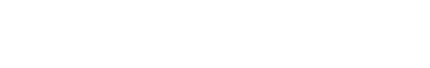

Para os dados, ajuste uma reta de mínimos quadrados

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def linear_regression(x, y):
  n = len(x)
  sum_y = sum(y)
  sum_x = sum(x)
  sum_xy = sum(x*y)
  sum_x2 = sum(x**2)

  b0 = (n*sum_xy - sum_x*sum_y)/(n*sum_x2 - sum_x**2)

  return b0, (sum_y - b0*sum_x)/n

In [3]:
x = np.array([4.2, 5.1, 6.0, 7.3, 8.1, 8.6, 9.2, 9.8])
y = np.array([1.2, 1.3, 1.9, 2.1, 2.6, 3.0, 3.3, 3.4])

In [4]:
def draw_points_regression(x, y):
  b0, b1 = linear_regression(x, y)
  x_reg = np.linspace(min(x), max(x), 100)
  y_reg = b0 * x_reg + b1

  plt.scatter(x, y, color='blue', label='Pontos de dados')
  plt.plot(x_reg, y_reg, color='red', label=f'Reta de regressão (y={b0:.4f}x + {b1:.4f})')

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Regressão Linear')
  plt.legend()
  plt.grid(True)
  return plt

In [6]:
linear_regression(x, y)

(np.float64(0.4213034461457009), np.float64(-0.7202488637867956))

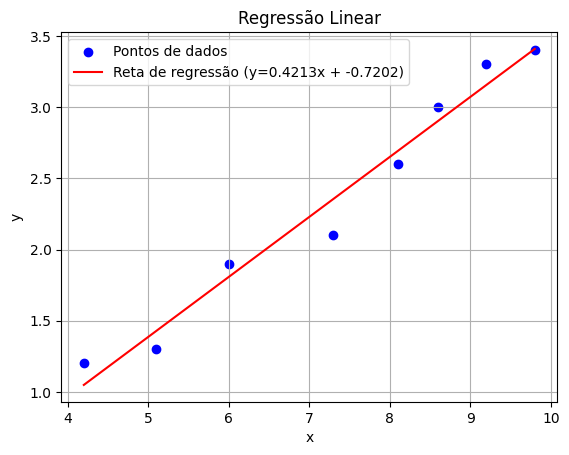

In [5]:
plt = draw_points_regression(x, y)
plt.show()